In [ ]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.svm import OneClassSVM

plt.style.use('ggplot')

warnings.filterwarnings('ignore', message='is_sparse is deprecated')
warnings.filterwarnings('ignore', message='The behavior of DataFrame concatenation with empty or all-NA entries is deprecated')
warnings.filterwarnings('ignore', message='is_categorical_dtype is deprecated')
warnings.filterwarnings('ignore', message='use_inf_as_na option is deprecated')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

bin_data = pd.read_csv('/content/drive/My Drive/cmput_644_project/datasets/binary_data_full.csv')
bin_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,label
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,abnormal
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,abnormal
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,1,0,normal
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,1,0,0,0,0,0,abnormal


In [ ]:
bin_data.label.value_counts()

normal      67343
abnormal    58630
Name: label, dtype: int64

In [ ]:
normal_df = bin_data[bin_data['label'] == 'normal']

normal_df = normal_df.drop('label', axis=1)

In [ ]:
normal_df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
12,-0.110249,-0.007713,-0.004359,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125965,-0.110249,-0.007382,-0.004828,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125967,-0.110249,-0.007701,-0.004825,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
normal_df= tf.convert_to_tensor(normal_df, dtype=tf.float32)

# test set prep

In [ ]:
test_set = pd.DataFrame(columns=bin_data.columns)

benign_samples = bin_data[bin_data['label'] == 'normal'].sample(n=50000, replace=True)
test_set = pd.concat([test_set, benign_samples])

abnormal_samples =  bin_data[bin_data['label'] == 'abnormal'].sample(n=5000, replace=True)
test_set = pd.concat([test_set, abnormal_samples])

test_set = test_set.reset_index(drop=True)

y_test = pd.DataFrame(test_set['label'])
test_set = test_set.drop('label', axis=1)

In [ ]:
test_set

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,-0.110249,-0.007204,-0.004824,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
1,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,1,0,0,0,0,0,0,0,0,0
3,-0.110249,-0.007602,-0.004837,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,0,0,0,0,0,0,0,0,1,0
4,-0.110249,-0.007755,-0.004890,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,-0.110249,0.001529,-0.003103,-0.014089,-0.089486,-0.007736,0.370049,-0.027023,1.235694,-0.011664,...,0,0,0,1,0,0,0,0,0,0
54996,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,0,0,0,0,1,0,0,0,0,0
54997,-0.110249,0.001529,-0.002851,-0.014089,-0.089486,-0.007736,0.835174,-0.027023,1.235694,0.030104,...,0,0,0,0,0,0,0,0,1,0
54998,-0.110249,0.001529,-0.002851,-0.014089,-0.089486,-0.007736,0.835174,-0.027023,1.235694,0.030104,...,0,0,0,0,0,0,0,0,1,0


## autoencoder

In [ ]:
input_dim = normal_df.shape[1]
encoding_dim = 14

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

history = autoencoder.fit(normal_df, normal_df,
                          epochs=15,
                          batch_size=32,
                          shuffle=True,
                          validation_split=0.2)

Epoch 1/15
1684/1684 [==============================] - 7s 3ms/step - loss: 0.2502 - val_loss: 0.1761
Epoch 2/15
1684/1684 [==============================] - 4s 2ms/step - loss: 0.2245 - val_loss: 0.1731
Epoch 3/15
1684/1684 [==============================] - 4s 2ms/step - loss: 0.2229 - val_loss: 0.1723
Epoch 4/15
1684/1684 [==============================] - 5s 3ms/step - loss: 0.2222 - val_loss: 0.1717
Epoch 5/15
1684/1684 [==============================] - 5s 3ms/step - loss: 0.2218 - val_loss: 0.1714
Epoch 6/15
1684/1684 [==============================] - 4s 2ms/step - loss: 0.2213 - val_loss: 0.1705
Epoch 7/15
1684/1684 [==============================] - 4s 2ms/step - loss: 0.2207 - val_loss: 0.1703
Epoch 8/15
1684/1684 [==============================] - 6s 4ms/step - loss: 0.2205 - val_loss: 0.1702
Epoch 9/15
1684/1684 [==============================] - 4s 3ms/step - loss: 0.2204 - val_loss: 0.1701
Epoch 10/15
1684/1684 [==============================] - 4s 2ms/step - loss: 0.220

In [ ]:
test_set= tf.convert_to_tensor(test_set, dtype=tf.float32)

In [ ]:
predictions = autoencoder.predict(test_set)
mse = np.mean(np.power(test_set - predictions, 2), axis=1)

1719/1719 [==============================] - 3s 2ms/step


In [ ]:
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test['label']})

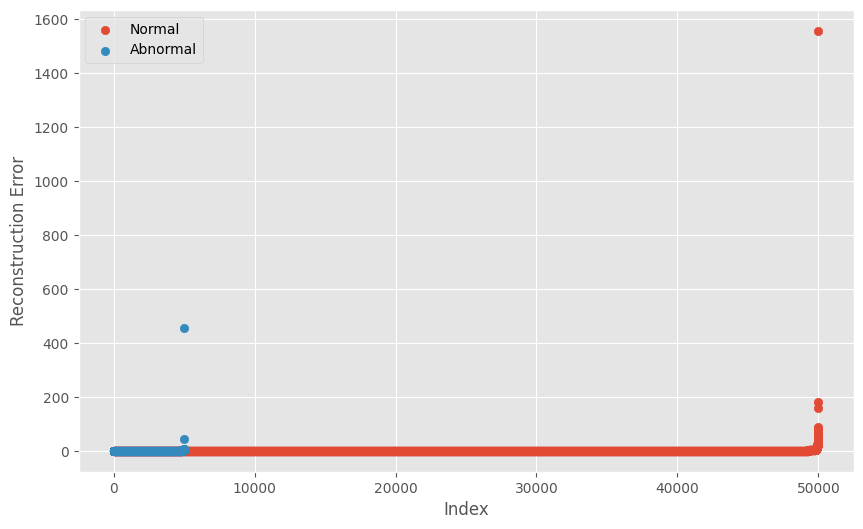

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(range(error_df[error_df['True_class']=='normal'].shape[0]),
            np.sort(error_df[error_df['True_class']=='normal']['Reconstruction_error'].values),
            label='Normal')
plt.scatter(range(error_df[error_df['True_class']=='abnormal'].shape[0]),
            np.sort(error_df[error_df['True_class']=='abnormal']['Reconstruction_error'].values),
            label='Abnormal')
plt.xlabel('Index')
plt.ylabel('Reconstruction Error')
plt.legend()
plt.show()

In [ ]:
threshold = np.percentile(error_df.Reconstruction_error.values, 75)

In [ ]:
y_test['label'].value_counts()

normal      50000
abnormal     5000
Name: label, dtype: int64

In [ ]:
pred_y = [1 if e > threshold else 0 for e in error_df.Reconstruction_error.values]

binary_y = [0 if l == 'normal' else 1 for l in y_test['label']]

In [ ]:
binary_y_series = pd.Series(binary_y)
print(binary_y_series.value_counts())

0    50000
1     5000
dtype: int64


In [ ]:
print(classification_report(binary_y, pred_y))

              precision    recall  f1-score   support

           0       0.99      0.82      0.89     50000
           1       0.33      0.90      0.48      5000

    accuracy                           0.82     55000
   macro avg       0.66      0.86      0.69     55000
weighted avg       0.93      0.82      0.86     55000



In [ ]:
def print_metrics(y_true, y_pred):
    print('Accuracy:', metrics.accuracy_score(y_true, y_pred))
    print('Precision:', metrics.precision_score(y_true, y_pred))
    print('Recall:', metrics.recall_score(y_true, y_pred))
    print('F1 Score:', metrics.f1_score(y_true, y_pred))

print_metrics(binary_y, pred_y)

Accuracy: 0.823
Precision: 0.32780565859335226
Recall: 0.9014
F1 Score: 0.48077230785641906


In [ ]:
cm = confusion_matrix(binary_y, pred_y)
print(cm)

[[40758  9242]
 [  493  4507]]


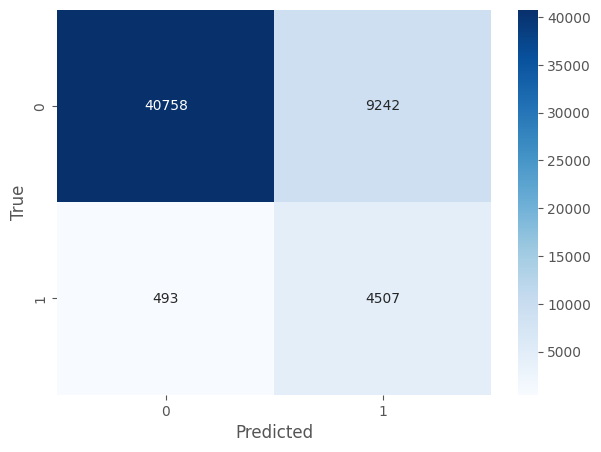

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

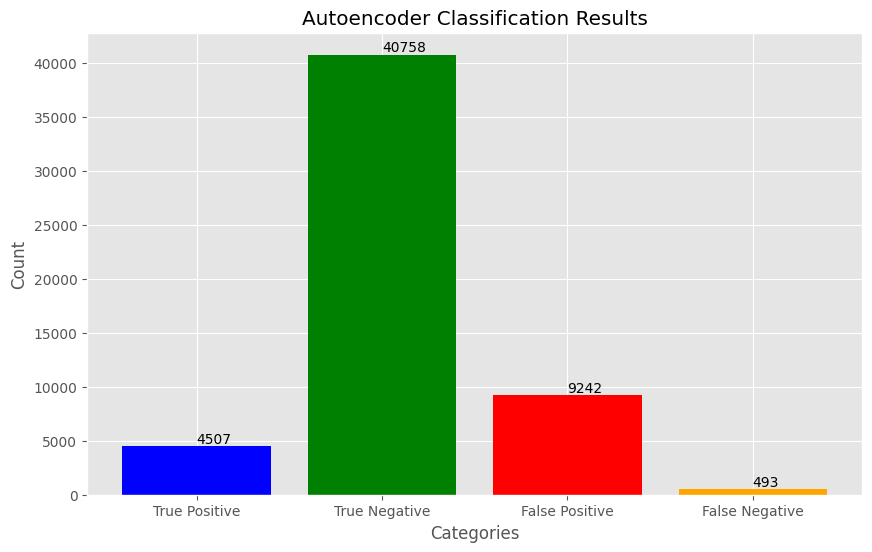

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(binary_y, pred_y)

TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

categories = ['True Positive', 'True Negative', 'False Positive', 'False Negative']

values = [TP, TN, FP, FN]

colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 6))
barplot = plt.bar(categories, values, color=colors)

for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Autoencoder Classification Results')
plt.show()

In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/anomaly_detection'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'anomaly_detection_autoencoder_model.pkl')

joblib.dump(autoencoder, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/anomaly_detection/anomaly_detection_autoencoder_model.pkl


## isolation forest

In [ ]:
isolation_forest_model = IsolationForest(n_estimators=10000, contamination='auto')
isolation_forest_model.fit(normal_df)

IsolationForest(n_estimators=10000)

In [ ]:
test_set_tensor = tf.convert_to_tensor(test_set, dtype=tf.float32)
isolation_predictions = isolation_forest_model.predict(test_set_tensor)

In [ ]:
Y_pred_IF = [1 if i == -1 else 0 for i in isolation_predictions]

Y_IF = binary_y

In [ ]:
accuracy = accuracy_score(Y_IF, Y_pred_IF)
precision = precision_score(Y_IF, Y_pred_IF)
recall = recall_score(Y_IF, Y_pred_IF)
f1 = f1_score(Y_IF, Y_pred_IF)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.96
Precision: 0.70
Recall: 0.89
F1 Score: 0.78


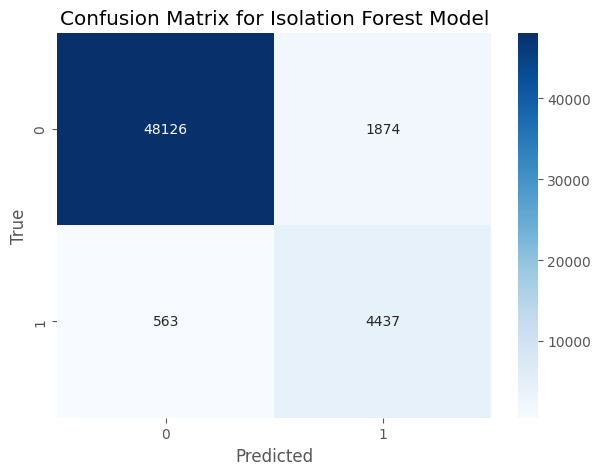

In [ ]:
cm = confusion_matrix(Y_IF, Y_pred_IF)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Isolation Forest Model')
plt.show()

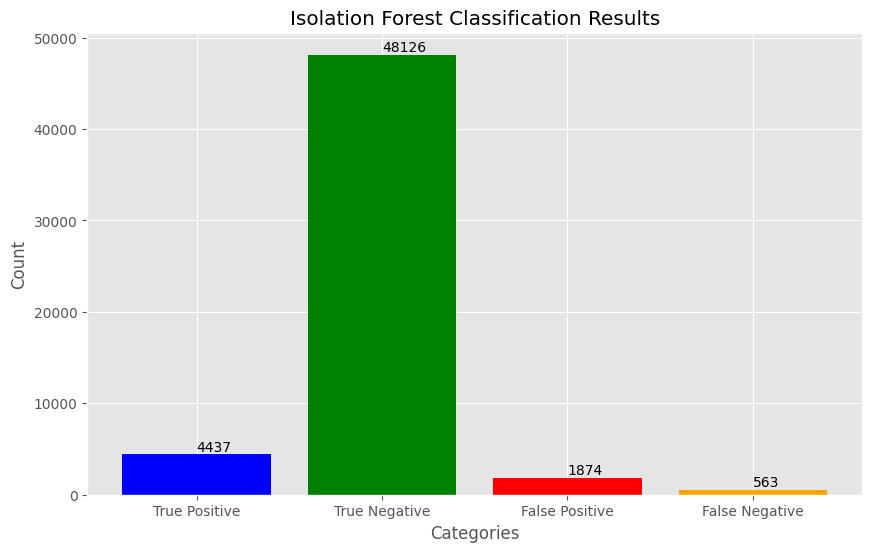

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_IF, Y_pred_IF)

TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

categories = ['True Positive', 'True Negative', 'False Positive', 'False Negative']

values = [TP, TN, FP, FN]

colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 6))
barplot = plt.bar(categories, values, color=colors)

for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Isolation Forest Classification Results')
plt.show()

In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/anomaly_detection'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'anomaly_detection_isolation_forest_model.pkl')

joblib.dump(isolation_forest_model, model_path)

print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/cmput_644_project/anomaly_detection/anomaly_detection_isolation_forest_model.pkl


## one class svm

In [ ]:
one_class_svm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
one_class_svm_model.fit(normal_df)

OneClassSVM(gamma='auto', nu=0.01)

In [ ]:
test_set_tensor = tf.convert_to_tensor(test_set, dtype=tf.float32)

predictions = one_class_svm_model.predict(test_set_tensor)

Y_pred = [1 if i == -1 else 0 for i in predictions]

In [ ]:
Y_test = [0 if l == 'normal' else 1 for l in y_test['label']]

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.91
Precision: 0.55
Recall: 0.13
F1 Score: 0.21


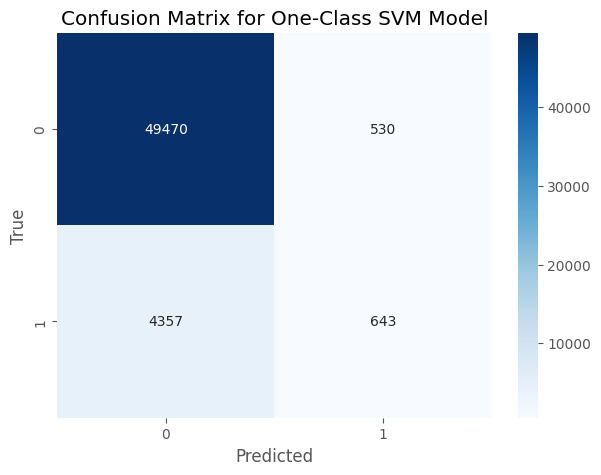

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for One-Class SVM Model')
plt.show()

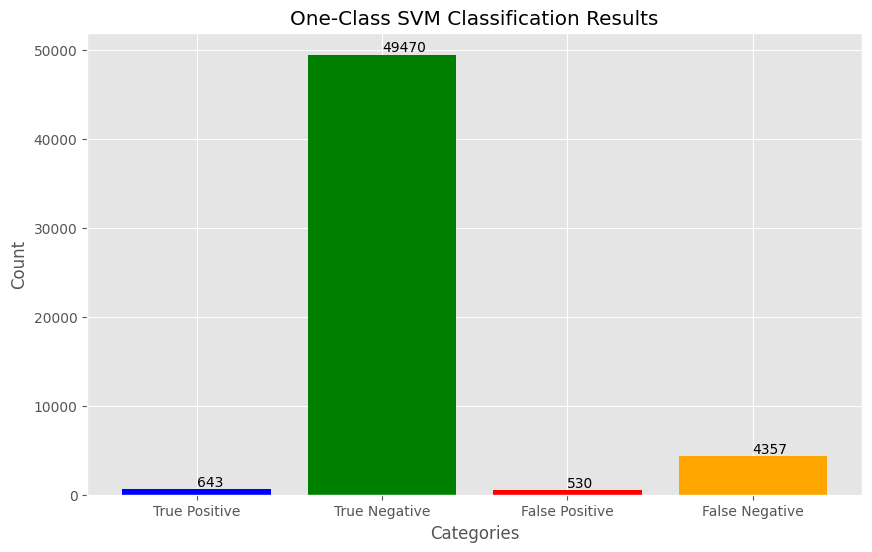

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Y_pred_np = np.array(Y_pred)
Y_test_np = np.array(Y_test)

TP = np.sum((Y_pred_np == 1) & (Y_test_np == 1)) # True Positives (correctly predicted abnormal)
TN = np.sum((Y_pred_np == 0) & (Y_test_np == 0)) # True Negatives (correctly predicted normal)
FP = np.sum((Y_pred_np == 1) & (Y_test_np == 0)) # False Positives (normal predicted as abnormal)
FN = np.sum((Y_pred_np == 0) & (Y_test_np == 1)) # False Negatives (abnormal predicted as normal)

categories = ['True Positive', 'True Negative', 'False Positive', 'False Negative']

values = [TP, TN, FP, FN]

colors = ['blue', 'green', 'red', 'orange']

plt.figure(figsize=(10, 6))
barplot = plt.bar(categories, values, color=colors)

for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')

plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('One-Class SVM Classification Results')
plt.show()

In [ ]:
import os
import joblib

model_dir = '/content/drive/My Drive/cmput_644_project/anomaly_detection'

if not os.path.exists(model_dir):
    os.makedirs(model_dir)

model_path = os.path.join(model_dir, 'anomaly_detection_one_class_svm_model.pkl')

joblib.dump(isolation_forest_model, model_path)

print(f"Model saved to {model_path}")